In [1]:
from consts import *
import numpy as np


_x = np.arange(x_start, x_end, dx)

In [7]:
# Ahead contidions
rho_A = 1.4
u_A =  0
p_A = 1

U0_A = np.array([rho_A, u_A, p_A])


# Behind conditions
## Subsonic 
# rho_B = 0.585
# u_B = -0.8
# p_B = 0.295

# # Transonic
rho_B = 4.48*10**-4
u_B = -4
p_B = 1.28*10**-5


U0_B = np.array([rho_B, u_B, p_B])
# Take the middle point of the spatial domain
x_middle = x_end/2

# Define the initial condition, with A on the right and B on the right
U0 = np.array([U0_A if x > x_middle else U0_B for x in _x])

In [8]:
# LFx2
from lfx2 import LFx2
U_prop, a_prop, dt_arr = LFx2(U0, dx, c, t_end, gamma)

rho_sol = U_prop[:,:,0]
u_sol = U_prop[:,:,1]
p_sol = U_prop[:,:,2]


rho_res = Result(_x, rho_sol, c,"Expansion - rho" )
u_res = Result(_x, u_sol, c,"Expansion - u"  )
p_res = Result(_x, p_sol, c,"Expansion - p"  )
a_res = Result(_x, a_prop, c,"Expansion - a"  )



In [9]:
def get_invariants(U: np.ndarray, a: np.ndarray) -> np.ndarray:
    """
    Compute the invariants for the given U and a arrays.
    The invariants are computed as a-du and a + du.
    """

    delta = (gamma - 1)/2
    invariants_m = np.zeros((U.shape[0], U.shape[1]))
    invariants_p = np.zeros((U.shape[0], U.shape[1]))
    entropy = np.zeros((U.shape[0], U.shape[1]))
    rho = U[:,:,0]
    u = U[:,:,1]
    p = U[:,:,2]

    
    # Iterate over the time domain
    for i in range(U.shape[0]):
        a_arr = a[i,:].flatten()
        u_arr = u[i,:].flatten()
        p_arr = p[i,:].flatten()
        rho_arr = rho[i,:].flatten()
        # Compute the entropy
        entropy[i,:] = p_arr/(rho_arr**gamma)
        

        invariants_m[i,:] = a_arr - delta * u_arr
        invariants_p[i,:] = a_arr + delta * u_arr
    return invariants_m, invariants_p, entropy
    




In [ ]:
# Plot the results
%matplotlib qt

rho_res.animate()   	
rho_res.plot(save=True)

f:\Coding\Universita\GAF\.venv\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
%matplotlib qt

u_res.animate()
#u_res.plot(save=True)

In [ ]:
%matplotlib qt

p_res.animate()
#p_res.plot(save=True)

In [ ]:
%matplotlib qt

a_res.animate()
#a_res.plot(save=True)

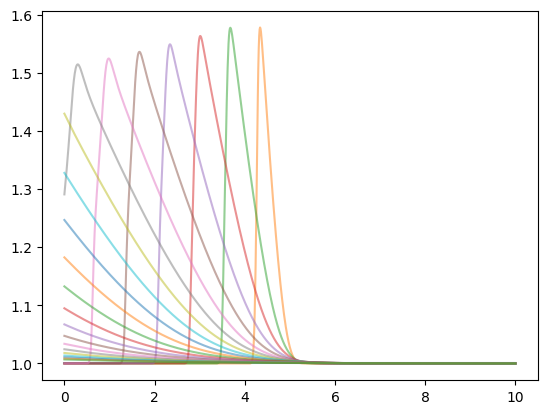

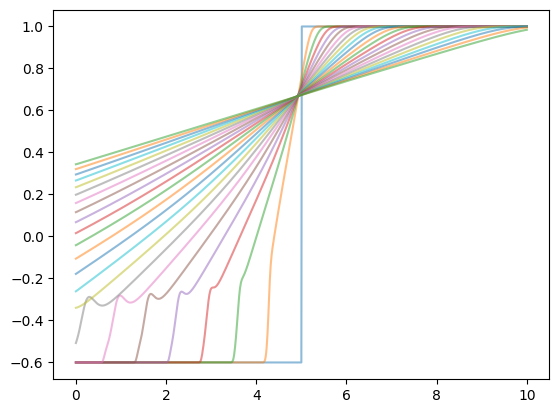

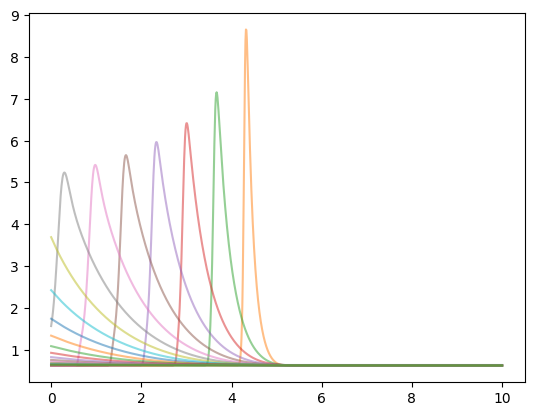

In [10]:
# Check the invariants 
delta = (gamma - 1)/2

inv_m, inv_p, entropy = get_invariants(U_prop, a_prop)


# Plot the invariants each ten time steps
import matplotlib.pyplot as plt
plt.figure()
steps = inv_m.shape[0]
for i in range(0, inv_m.shape[0], 100):
    plt.plot(_x, inv_m[i,:], label="Invariant m at n=" + str(i), alpha=0.5)
plt.show()

        
plt.figure()
for i in range(0, inv_p.shape[0], 100):
    plt.plot(_x, inv_p[i,:], label="Invariant p at n=" + str(i), alpha=0.5)
plt.show()

plt.figure()
for i in range(0, entropy.shape[0], 100):
    plt.plot(_x, entropy[i,:], label="Entropy at n=" + str(i), alpha=0.5)
plt.show()


In [ ]:
# 